In [2]:
using PyPlot

In [18]:
#Potential(x) = ( 0.5x^2 - 0.8) * exp(-0.19x^2)
# Potential(x) = -1/√(2.0 + x^2)
a = 0.8; nn = 0.05
Potential(x) =(0.4*x^2 - a)*e^(-nn*x^2)

Potential (generic function with 1 method)

# 势能

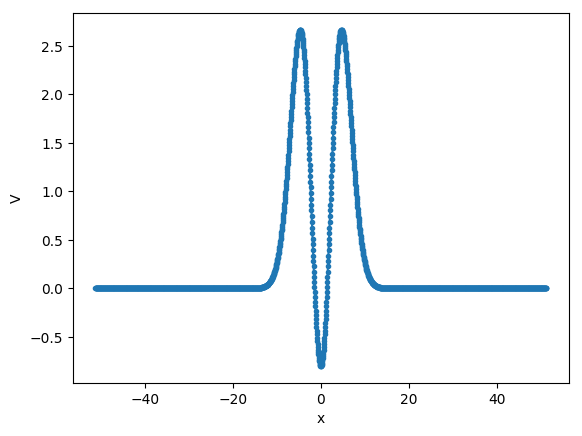

In [21]:
ns = 2^11;
dx = 0.05
x = linspace(-ns/2, ns/2, ns)*dx;
V = map(Potential, x);
plot(x, V, ".-"); xlabel("x"); ylabel("V");

In [22]:
function csm(dx::Float64, q::Complex128, V::Array{Complex128, 1})
    ns = length(V)
    H = spzeros(Complex, ns, ns)
    # not L
    a11 = 5/4dx^2 /q^2;
    a12 = -2/3dx^2 / q^2;
    a13 = 1/24dx^2 / q^2;
    shape = size(H)
    
    H[sub2ind(shape, 3 : ns   , 1 : ns-2)] = a13
    H[sub2ind(shape, 2 : ns   , 1 : ns-1)] = a12
    H[sub2ind(shape, 1 : ns   , 1 : ns  )] = a11 + V
    H[sub2ind(shape, 1 : ns-1 , 2 : ns  )] = a12
    H[sub2ind(shape, 1 : ns-2 , 3 : ns  )] = a13
    

    eigs(H; nev=200, which=:SR);
end

csm (generic function with 1 method)

Energy of five lowest levels: [-0.349106, 0.00296875, 0.00296875, 0.0118535, 0.0118535]
Energy of five lowest levels: [-0.349106, 0.00295637, 0.00295637, 0.0118045, 0.0118045]
Energy of five lowest levels: [-0.349106, 0.0029358, 0.0029358, 0.011723, 0.011723]
Energy of five lowest levels: [-0.349106, 0.00290713, 0.00290713, 0.0116095, 0.0116095]
Energy of five lowest levels: [-0.349106, 0.00287047, 0.00287047, 0.0114644, 0.0114644]


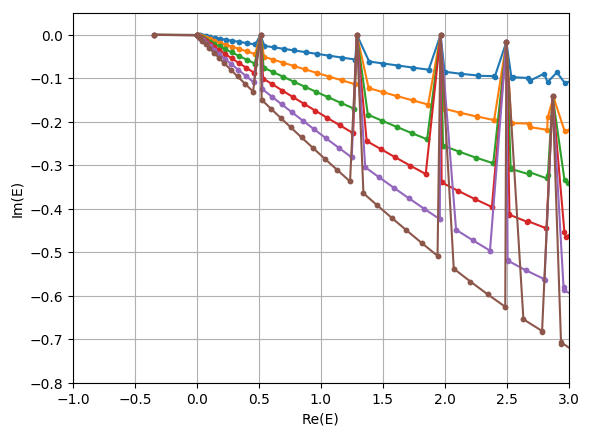

Energy of five lowest levels: [-0.349106, 0.002826, 0.002826, 0.0112883, 0.0112883]
 96.821348 seconds (1.74 M allocations: 238.610 MiB, 0.18% gc time)


In [23]:
@time for i in 1:6
    θ = 0.02*i
    q = e^(im*θ)
    xwork = x*q
    Vwork = map(Potential, xwork)
    
    E,λ = csm(dx, q, Vwork) 
    println("Energy of five lowest levels: $(real(E)[1:5])")
    plot(real(E), imag(E), ".-")
end
xlim([-1, 3]); ylim([-0.8, 0.05])
xlabel("Re(E)"); ylabel("Im(E)")
grid()